<a href="https://colab.research.google.com/github/Ademarf/simulacao_academia_halter/blob/main/Simulando_Academia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

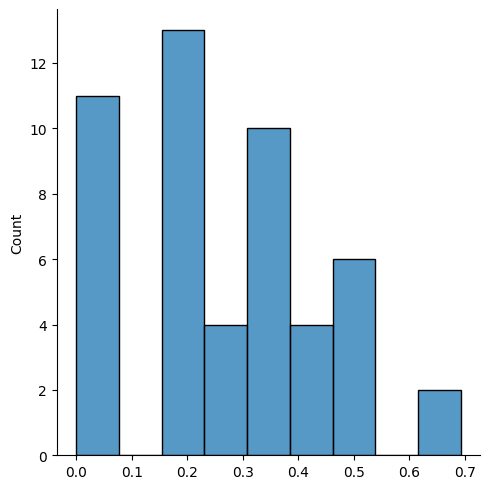

In [3]:
import random

class Academia:
    def __init__(self):
        self.halteres = [i for i in range(10, 36) if i % 2 == 0]
        self.porta_halteres = ()
        self.reinicar_o_dia()

    def reinicar_o_dia(self):
        self.porta_halteres = {i: i for i in self.halteres}

    def listar_halteres(self):
        return [i for i in self.porta_halteres.values() if i != 0]

    def listar_espacos(self):
        return [i for i, j in self.porta_halteres.items() if j == 0]

    def pegar_haltere(self, peso):
        halt_pos = list(self.porta_halteres.values()).index(peso)
        key_halt = list(self.porta_halteres.keys())[halt_pos]
        self.porta_halteres[key_halt] = 0
        return peso

    def devolver_halter(self, pos, peso):
        self.porta_halteres[pos] = peso

    def calcular_caos(self):
        num_caos = [i for i, j in self.porta_halteres.items()if i != j]
        return len(num_caos) / len(self.porta_halteres)


class Usuario:
    def __init__(self, tipo, academia):
        self.tipo = tipo # 1 - normal | 2 - Bagunceiro
        self.academia = academia
        self.peso = 0

    def iniciar_treino(self):
        lista_pesos = self.academia.listar_halteres()
        self.peso = random.choice(lista_pesos)
        self.academia.pegar_haltere(self.peso)

    def finalizar_treino(self):
        espacos = self.academia.listar_espacos()

        if self.tipo == 1:
            if self.peso in espacos:
                self.academia.devolver_halter(self.peso, self.peso)
            else:
                pos = random.choice(espacos)
                self.academia.devolver_halter(pos, self.peso)

        if self.tipo == 2:
            pos = random.choice(espacos)
            self.academia.devolver_halter(pos, self.peso)
        self.peso = 0

academia = Academia()

usuarios = [Usuario(1, academia) for i in range(10)]
usuarios += [Usuario(2, academia) for i in range(1)]
random.shuffle(usuarios)

list_chaos = []

for k in range(50):
    academia.reinicar_o_dia()
    for i in range(10):
        random.shuffle(usuarios)
        for user in usuarios:
            user.iniciar_treino()
        for user in usuarios:
            user.finalizar_treino()
    list_chaos += [academia.calcular_caos()]

import seaborn as sns
sns.displot(list_chaos)



